In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
filepath = "data/crypto_data.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df_sub = df.loc[df.IsTrading].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [4]:
df_sub.drop(["IsTrading"], axis=1)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1139,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1140,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1141,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1142,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [6]:
mask = df_sub.TotalCoinsMined > 0
df_sub = df_sub.loc[mask].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [7]:
df_clean = df_sub.drop(["CoinName", "Unnamed: 0"], axis=1)
df_clean.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,Scrypt,True,PoW/PoS,1.055185e+09,532000000
2,X13,True,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,True,PoW,1.792718e+07,21000000
4,Ethash,True,PoW,1.076842e+08,0


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   IsTrading        532 non-null    bool   
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(3)
memory usage: 17.3+ KB


In [9]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [10]:
print(df_clean.Algorithm.value_counts())
print(df_clean.ProofType.value_counts())

Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
X13                        17
PoS                        17
Quark                      13
Equihash                   12
NIST5                      10
NeoScrypt                  10
Multiple                    9
Ethash                      9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
Groestl                     4
Lyra2REv2                   4
Lyra2RE                     4
SHA-256D                    4
Lyra2Z                      4
X16R                        4
X15                         4
Dagger                      3
Blake                       3
SHA-512                     3
POS 3.0                     3
QuBit                       3
PHI1612                     2
Blake2b                     2
C11                         2
CryptoNight Heavy           2
SHA3                        2
Keccak                      2
Skein     

In [11]:
bunch = df_clean.Algorithm.value_counts()
alg_bunch = list(bunch[bunch < 10].index)
mask = df_clean.Algorithm.isin(alg_bunch)
df_clean.loc[mask, "Algorithm"] = "Other"

df_clean.Algorithm.value_counts()

Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

In [12]:
df_sub.loc[df_sub.ProofType == 'Pos', "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"

In [13]:
bunch2 = df_clean.ProofType.value_counts()
type_bunch = list(bunch2[bunch2 < 10].index)
mask2 = df_clean.ProofType.isin(type_bunch)
df_clean.loc[mask2, "ProofType"] = "Other"

df_clean.ProofType.value_counts()

PoW        237
PoW/PoS    176
PoS         86
Other       33
Name: ProofType, dtype: int64

In [14]:
# one hot encoding columns
cols_oh = ["Algorithm", "ProofType"]

# perform one hot encoding
df_oh = pd.get_dummies(df_clean.loc[:, cols_oh])
df_oh.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [15]:
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_clean.loc[:, num_cols]

scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [16]:
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalCoinsMined        532 non-null    float64
 1   TotalCoinSupply        532 non-null    float64
 2   Algorithm_CryptoNight  532 non-null    uint8  
 3   Algorithm_Equihash     532 non-null    uint8  
 4   Algorithm_NIST5        532 non-null    uint8  
 5   Algorithm_NeoScrypt    532 non-null    uint8  
 6   Algorithm_Other        532 non-null    uint8  
 7   Algorithm_PoS          532 non-null    uint8  
 8   Algorithm_Quark        532 non-null    uint8  
 9   Algorithm_SHA-256      532 non-null    uint8  
 10  Algorithm_Scrypt       532 non-null    uint8  
 11  Algorithm_X11          532 non-null    uint8  
 12  Algorithm_X13          532 non-null    uint8  
 13  ProofType_Other        532 non-null    uint8  
 14  ProofType_PoS          532 non-null    uint8  
 15  ProofT

In [17]:
# TSNE Train Df
tsne = TSNE(random_state=1)
tsne_features = tsne.fit_transform(df_train)
df_tsne = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
df_tsne.head()

,Feature1,Feature2
0,19.585127,-9.961611
1,24.910057,-6.700049
2,2.164567,10.364314
3,-12.512018,2.983196
4,-21.186621,15.786347


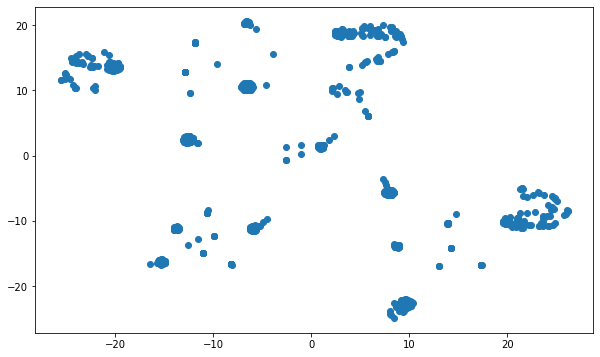

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne["Feature1"], df_tsne["Feature2"])
plt.show()

In [19]:
corrs = df_train.corr()
corrs

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
TotalCoinsMined,1.000000,0.702301,0.046358,-0.015083,-0.004300,-0.014830,0.064477,-0.020827,-0.018368,-0.025781,-0.009377,-0.042141,0.007338,0.171600,-0.032824,-0.017466,-0.043840
TotalCoinSupply,0.702301,1.000000,0.191816,-0.017729,-0.014702,-0.020049,0.025065,-0.027379,-0.023895,-0.034459,-0.015754,-0.049680,0.022187,0.110378,-0.044096,0.033228,-0.057185
Algorithm_CryptoNight,0.046358,0.191816,1.000000,-0.029235,-0.026637,-0.026637,-0.109997,-0.034965,-0.030458,-0.060606,-0.138778,-0.076749,-0.034965,-0.049491,-0.084508,0.214711,-0.135316
Algorithm_Equihash,-0.015083,-0.017729,-0.029235,1.000000,-0.021026,-0.021026,-0.086827,-0.027600,-0.024042,-0.047840,-0.109545,-0.060582,-0.027600,0.013417,-0.032319,0.118542,-0.106812
Algorithm_NIST5,-0.004300,-0.014702,-0.026637,-0.021026,1.000000,-0.019157,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.035594,-0.023180,-0.068363,0.108599
Algorithm_NeoScrypt,-0.014830,-0.020049,-0.026637,-0.021026,-0.019157,1.000000,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.035594,-0.060778,0.070876,-0.009068
Algorithm_Other,0.064477,0.025065,-0.109997,-0.086827,-0.079109,-0.079109,1.000000,-0.103845,-0.090459,-0.179995,-0.412159,-0.227939,-0.103845,0.196693,-0.013946,0.075855,-0.170052
Algorithm_PoS,-0.020827,-0.027379,-0.034965,-0.027600,-0.025147,-0.025147,-0.103845,1.000000,-0.028755,-0.057216,-0.131015,-0.072456,-0.033010,-0.002415,0.384720,-0.162849,-0.127747
Algorithm_Quark,-0.018368,-0.023895,-0.030458,-0.024042,-0.021905,-0.021905,-0.090459,-0.028755,1.000000,-0.049841,-0.114127,-0.063117,-0.028755,-0.040700,0.161995,-0.117362,0.018093
Algorithm_SHA-256,-0.025781,-0.034459,-0.060606,-0.047840,-0.043588,-0.043588,-0.179995,-0.057216,-0.049841,1.000000,-0.227091,-0.125589,-0.057216,-0.053785,-0.013534,0.047739,-0.012267


[0.494, 0.117, 0.089, 0.082, 0.059, 0.05, 0.031, 0.021, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.0, 0.0]


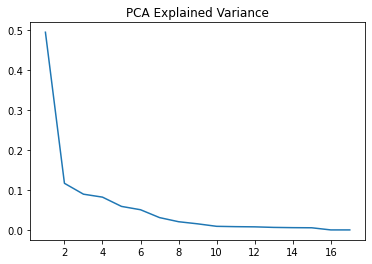

In [20]:
# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [21]:
pca = PCA(n_components=0.9)
pca.fit(df_train)

df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
0,-0.216701,-0.898287,0.382476,-0.366787,-0.106026,-0.292298,0.003415
1,-0.194813,-0.900383,0.374279,-0.373302,-0.106655,-0.290808,0.003758
2,3.523652,-0.461138,2.181013,1.970672,-0.172416,-0.108218,0.213624
3,-0.186045,0.645284,-0.011848,-0.092972,-0.200018,0.457681,0.818139
4,-0.157632,0.845546,-0.366472,0.200519,-0.265808,-0.423239,-0.068999


In [22]:
# TSNE PSA Df
tsne2 = TSNE(random_state=1)
tsne_features2 = tsne.fit_transform(df_pca)
df_tsne2 = pd.DataFrame(tsne_features2, columns=["Feature1", "Feature2"])
df_tsne2.head()

,Feature1,Feature2
0,-0.826428,-28.399445
1,4.044125,-24.543318
2,-3.658711,9.247469
3,19.128918,26.585522
4,-27.202530,7.855087


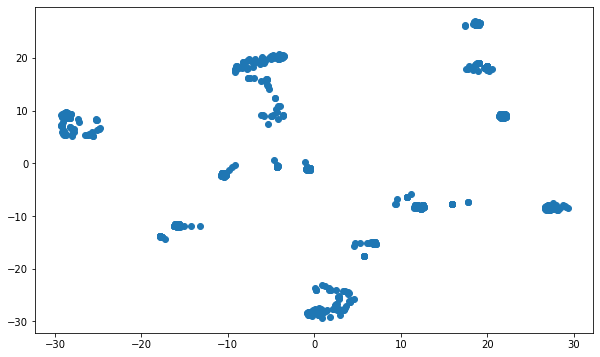

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne2["Feature1"], df_tsne2["Feature2"])
plt.show()

In [24]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1693.747431
1,2,1009.996897
2,3,796.994210
3,4,603.434045
4,5,486.616090


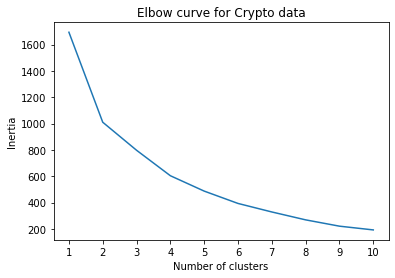

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto data')
plt.show()

In [26]:
# It appears as though a clustering of 4 groups would be ideal as there is 
# a bend in the elbow curve. Also at 6, there appears to be some potential there.
# Further analysis is needed to reach the final conclusion.

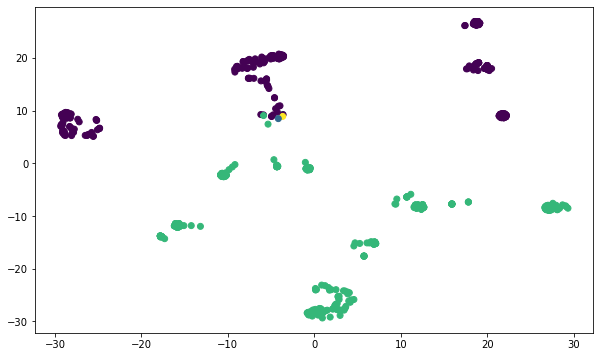

In [27]:
 # Initializing model with K =  4
k = 4
model = KMeans(n_clusters=k, random_state=1)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne2["Feature1"], df_tsne2["Feature2"], c=k_labels)
plt.show()

In [28]:
def getSilhouette(X, range_n_clusters, model = "kmeans"):
    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        else:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters,
                                 affinity='euclidean',
                                 linkage='ward')
            
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(
            f"Silhouette analysis for {model} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9190239434243017
For n_clusters = 3 The average silhouette_score is : 0.3082220248663754
For n_clusters = 4 The average silhouette_score is : 0.3103538193183306
For n_clusters = 5 The average silhouette_score is : 0.3764218368090132
For n_clusters = 6 The average silhouette_score is : 0.40118905393382875
For n_clusters = 7 The average silhouette_score is : 0.421811311569978
For n_clusters = 8 The average silhouette_score is : 0.443552083433856
For n_clusters = 9 The average silhouette_score is : 0.5473120003804814


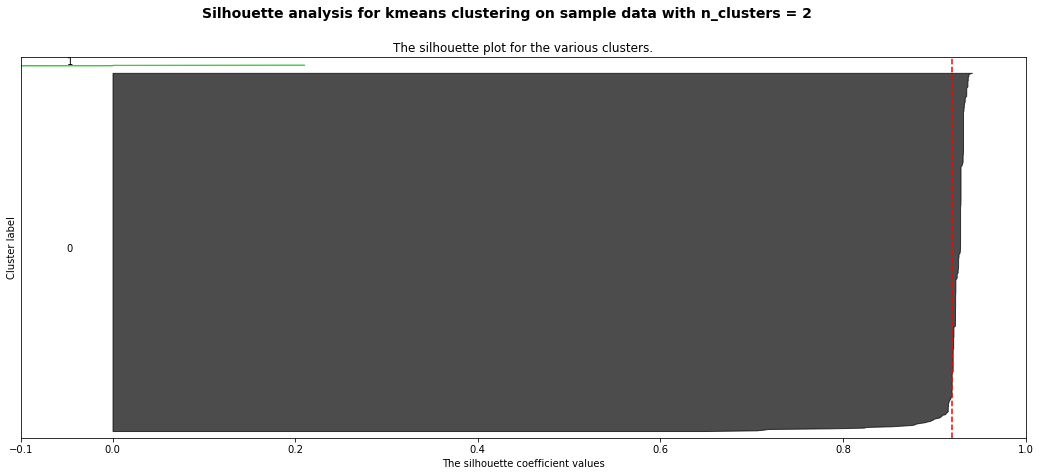

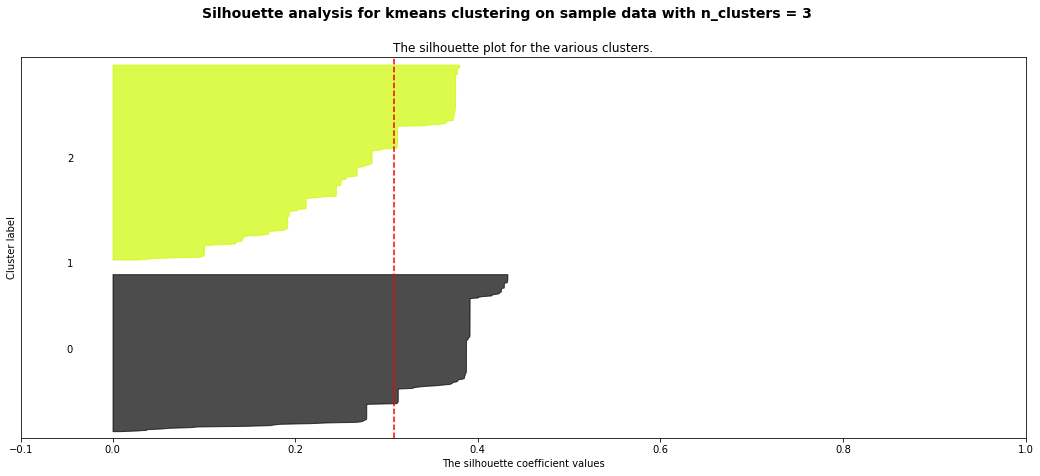

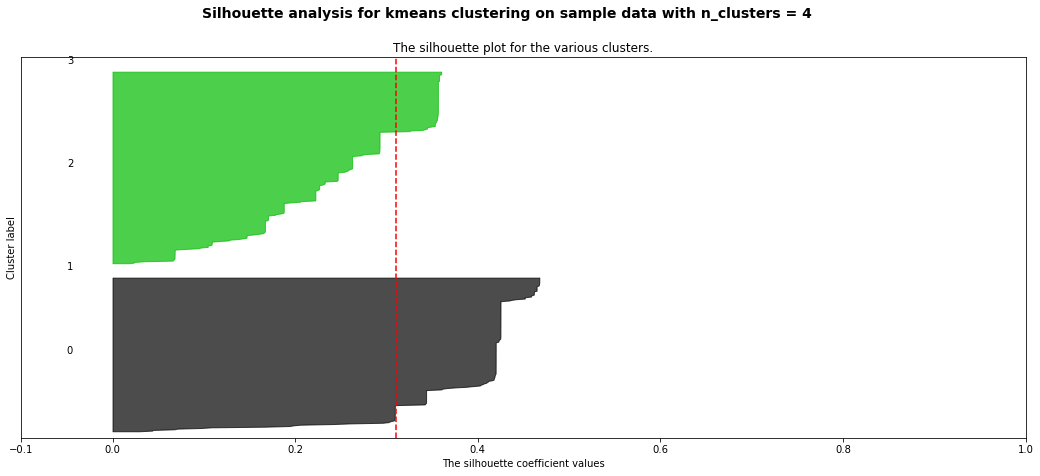

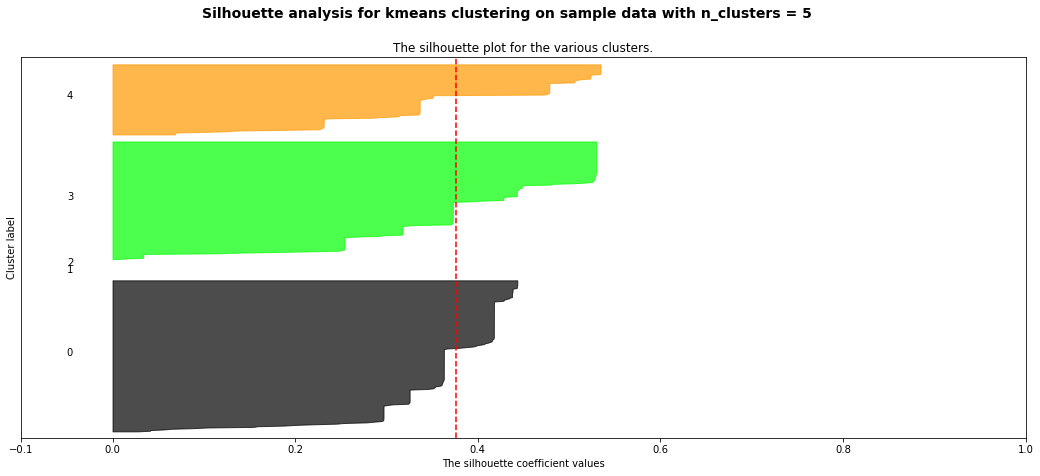

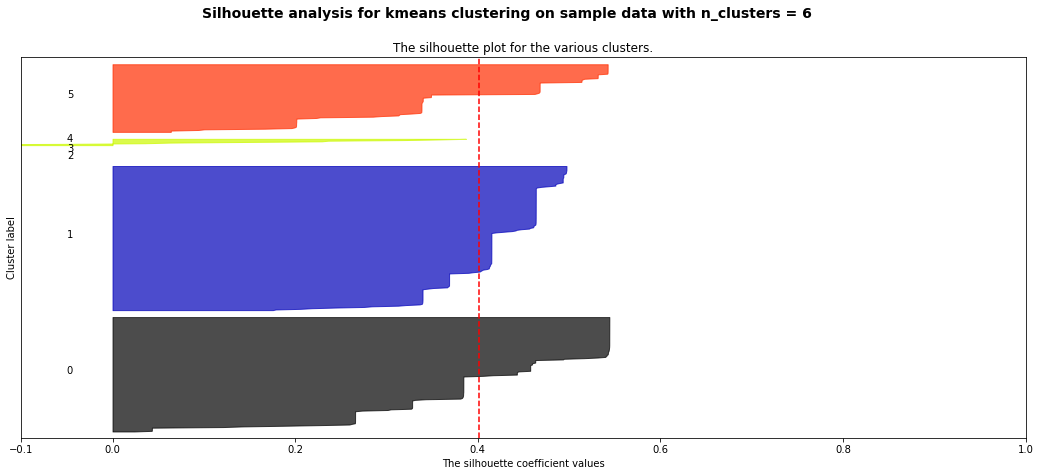

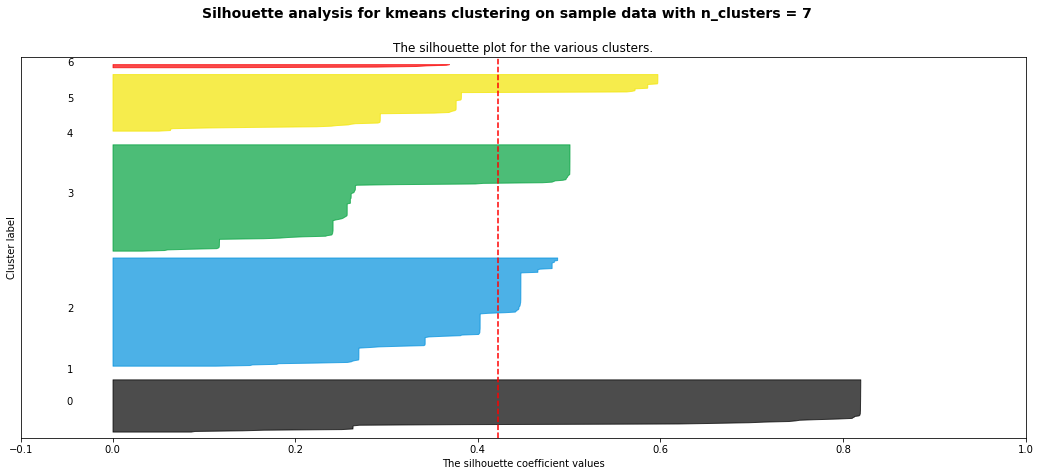

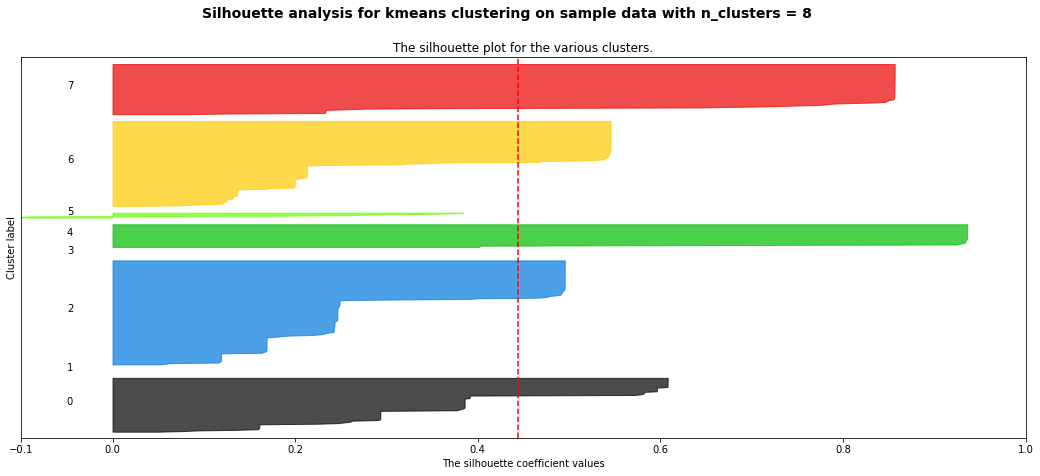

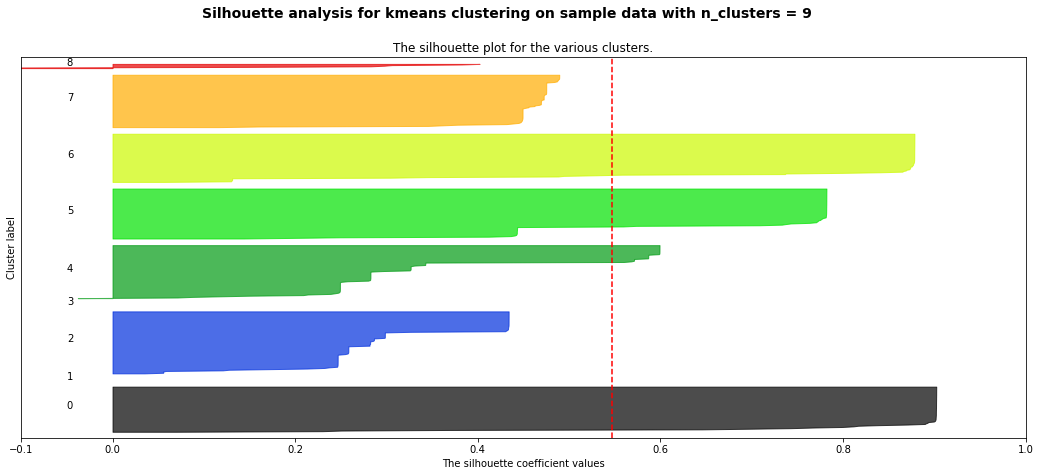

In [29]:
X = df_pca.values
range_n_clusters  = list(range(2,10))

getSilhouette(X, range_n_clusters, "kmeans")

In [30]:
# There is only 1 crypto in 2 of the 4 groups.

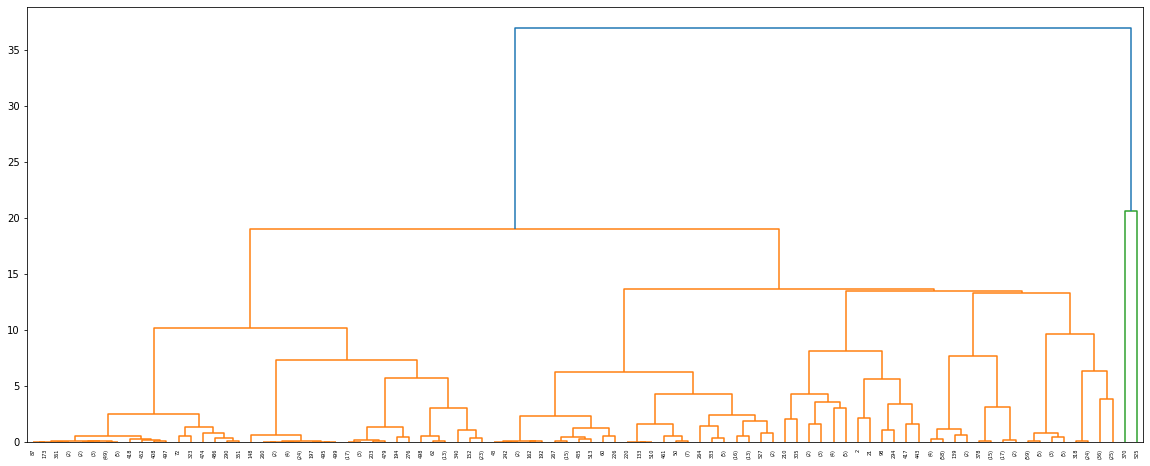

In [31]:
  # Hierarchicalalal Agglomerative
mergings = linkage(df_pca, method='ward')

plt.figure(figsize=(20,8))
dendrogram(mergings,
           p = 7,
           truncate_mode = 'level',
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [32]:
# Once taking the 2 outlying coins, hwo will this change the grouping

In [33]:
coins = df_sub.CoinName

In [34]:
df_names = pd.DataFrame()
df_names["CoinName"] = coins
df_names["Cluster"] = k_labels
df_names.Cluster.value_counts()

2    294
0    236
1      1
3      1
Name: Cluster, dtype: int64

In [35]:
print(df_names.loc[df_names.Cluster == 1])
print(df_names.loc[df_names.Cluster == 3])

       CoinName  Cluster
525  BitTorrent        1
       CoinName  Cluster
370  TurtleCoin        3


In [36]:
df_sub = df_sub.drop(df_sub.index[df_sub.CoinName == 'BitTorrent'])

In [37]:
df_sub = df_sub.drop(df_sub.index[df_sub.CoinName == 'TurtleCoin'])

In [38]:
df_sub.index = range(len(df_sub))

In [39]:
df_sub.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       530 non-null    object 
 1   CoinName         530 non-null    object 
 2   Algorithm        530 non-null    object 
 3   IsTrading        530 non-null    bool   
 4   ProofType        530 non-null    object 
 5   TotalCoinsMined  530 non-null    float64
 6   TotalCoinSupply  530 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.5+ KB


In [40]:
df_clean = df_sub.drop(["CoinName", "Unnamed: 0"], axis=1)
df_clean.head()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        530 non-null    object 
 1   IsTrading        530 non-null    bool   
 2   ProofType        530 non-null    object 
 3   TotalCoinsMined  530 non-null    float64
 4   TotalCoinSupply  530 non-null    object 
dtypes: bool(1), float64(1), object(3)
memory usage: 17.2+ KB
None


In [41]:
bunch = df_clean.Algorithm.value_counts()
alg_bunch = list(bunch[bunch < 10].index)
mask = df_clean.Algorithm.isin(alg_bunch)
df_clean.loc[mask, "Algorithm"] = "Other"

df_clean.Algorithm.value_counts()

Scrypt         182
Other          130
X11             73
SHA-256         48
CryptoNight     18
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

In [42]:
df_sub.loc[df_sub.ProofType == 'Pos', "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"

In [43]:
bunch2 = df_clean.ProofType.value_counts()
type_bunch = list(bunch2[bunch2 < 10].index)
mask2 = df_clean.ProofType.isin(type_bunch)
df_clean.loc[mask2, "ProofType"] = "Other"

df_clean.ProofType.value_counts()

PoW        236
PoW/PoS    180
PoS         87
Other       27
Name: ProofType, dtype: int64

In [44]:
# one hot encoding columns
cols_oh = ["Algorithm", "ProofType"]

# perform one hot encoding
df_oh = pd.get_dummies(df_clean.loc[:, cols_oh])
df_oh.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [45]:
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_clean.loc[:, num_cols]

scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.214536,-0.218050
1,-0.147807,-0.200552
2,1.637081,10.114835
3,-0.213403,-0.217359
4,-0.207726,-0.218050


In [46]:
print(df_num.info())
print(df_oh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TotalCoinsMined  530 non-null    float64
 1   TotalCoinSupply  530 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Algorithm_CryptoNight  530 non-null    uint8
 1   Algorithm_Equihash     530 non-null    uint8
 2   Algorithm_NIST5        530 non-null    uint8
 3   Algorithm_NeoScrypt    530 non-null    uint8
 4   Algorithm_Other        530 non-null    uint8
 5   Algorithm_PoS          530 non-null    uint8
 6   Algorithm_Quark        530 non-null    uint8
 7   Algorithm_SHA-256      530 non-null    uint8
 8   Algorithm_Scrypt       530 non-null    uint8
 9   Algorit

In [47]:
df_train = pd.concat([df_num, df_oh], axis=1).reset_index()
df_train.head()
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  530 non-null    int64  
 1   TotalCoinsMined        530 non-null    float64
 2   TotalCoinSupply        530 non-null    float64
 3   Algorithm_CryptoNight  530 non-null    uint8  
 4   Algorithm_Equihash     530 non-null    uint8  
 5   Algorithm_NIST5        530 non-null    uint8  
 6   Algorithm_NeoScrypt    530 non-null    uint8  
 7   Algorithm_Other        530 non-null    uint8  
 8   Algorithm_PoS          530 non-null    uint8  
 9   Algorithm_Quark        530 non-null    uint8  
 10  Algorithm_SHA-256      530 non-null    uint8  
 11  Algorithm_Scrypt       530 non-null    uint8  
 12  Algorithm_X11          530 non-null    uint8  
 13  Algorithm_X13          530 non-null    uint8  
 14  ProofType_Other        530 non-null    uint8  
 15  ProofT

In [48]:
# TSNE Train Df
tsne = TSNE(random_state=1)
tsne_features = tsne.fit_transform(df_train)
df_tsne = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
df_tsne.head()

,Feature1,Feature2
0,6.063226,-28.187399
1,5.965343,-28.188686
2,6.465791,-27.695856
3,5.678871,-28.209095
4,5.970383,-27.743732


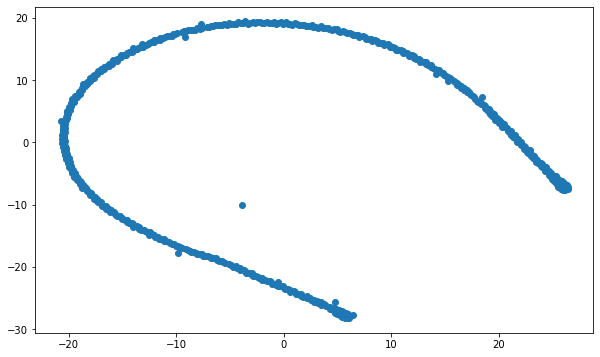

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne["Feature1"], df_tsne["Feature2"])
plt.show()

In [50]:
corrs = df_tsne.corr()
corrs

,Feature1,Feature2
Feature1,1.000000,0.031904
Feature2,0.031904,1.000000


[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


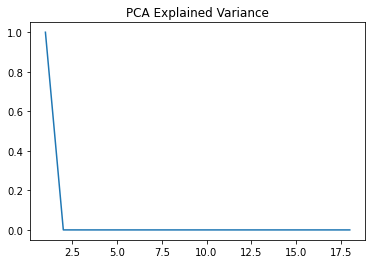

In [51]:
# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [52]:
pca = PCA(n_components=0.9)
pca.fit(df_train)

df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1
0,264.500151
1,263.500161
2,262.502148
3,261.500135
4,260.499632


In [53]:
# TSNE PSA Df
tsne2 = TSNE(random_state=1)
tsne_features2 = tsne.fit_transform(df_pca)
df_tsne2 = pd.DataFrame(tsne_features2, columns=["Feature1", "Feature2"])
df_tsne2.head()

,Feature1,Feature2
0,-5.762058,28.409376
1,-5.882674,28.449810
2,-5.754627,28.122282
3,-5.779128,27.968330
4,-6.235531,28.435757


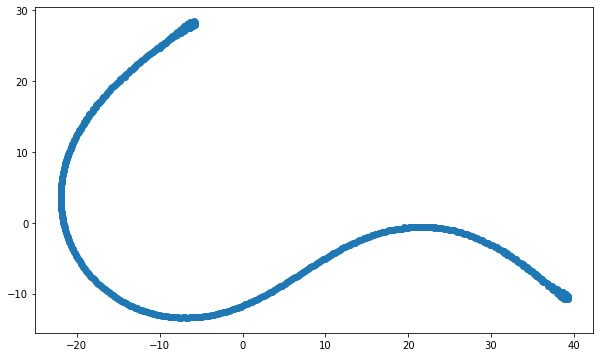

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne2["Feature1"], df_tsne2["Feature2"])
plt.show()

In [55]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1.240638e+07
1,2,3.101697e+06
2,3,1.378653e+06
3,4,7.762516e+05
4,5,4.963722e+05


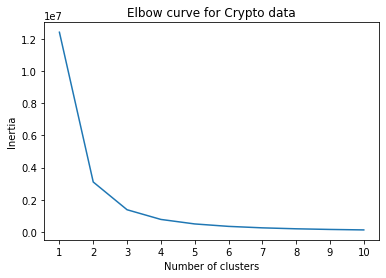

In [56]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto data')
plt.show()

In [57]:
# Here it looks as though a clustering of 3 groups will be ideal. 

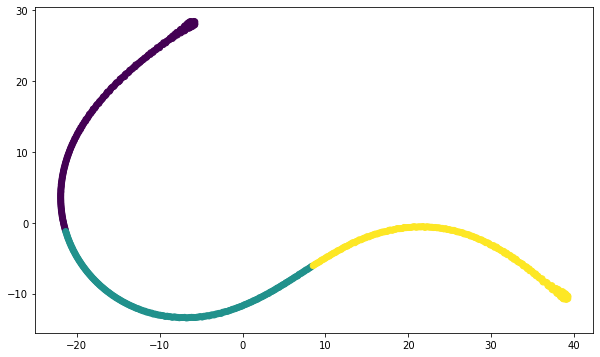

In [58]:
 # Initializing model with K = 3
k = 3
model = KMeans(n_clusters=k, random_state=1)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne2["Feature1"], df_tsne2["Feature2"], c=k_labels)
plt.show()

In [59]:
def getSilhouette(X, range_n_clusters, model = "kmeans"):
    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        else:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters,
                                 affinity='euclidean',
                                 linkage='ward')
            
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(
            f"Silhouette analysis for {model} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6253271310787624
For n_clusters = 3 The average silhouette_score is : 0.5878985195016626
For n_clusters = 4 The average silhouette_score is : 0.5686894215609868
For n_clusters = 5 The average silhouette_score is : 0.5570001966534434
For n_clusters = 6 The average silhouette_score is : 0.5481757922339112
For n_clusters = 7 The average silhouette_score is : 0.5419613231270781
For n_clusters = 8 The average silhouette_score is : 0.5370542765956807
For n_clusters = 9 The average silhouette_score is : 0.5328061946160825


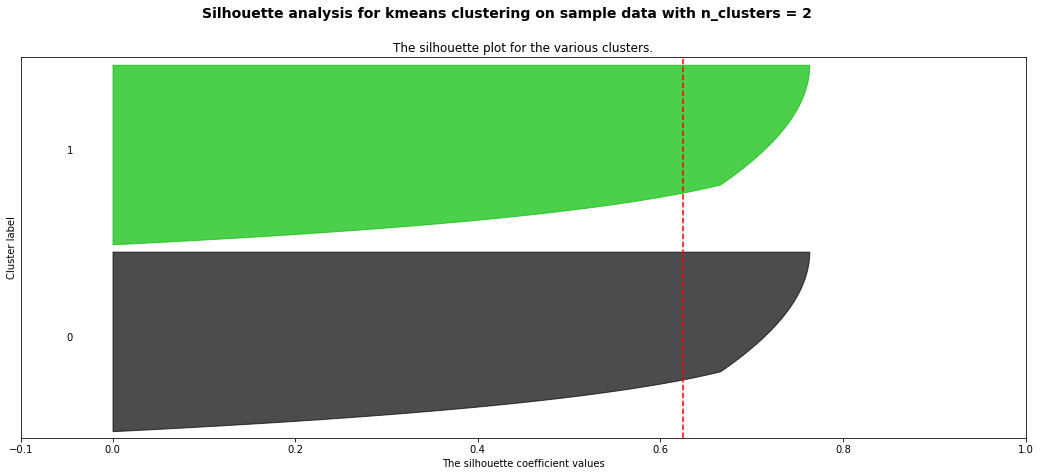

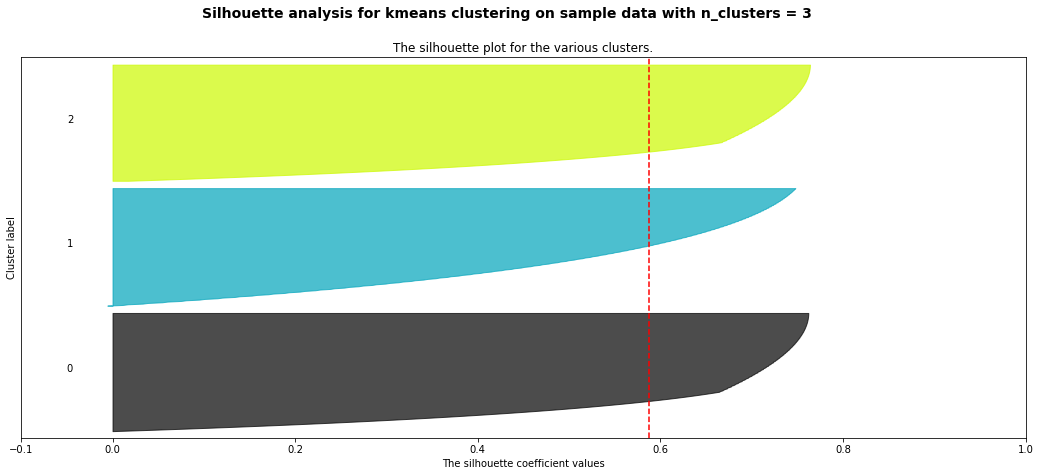

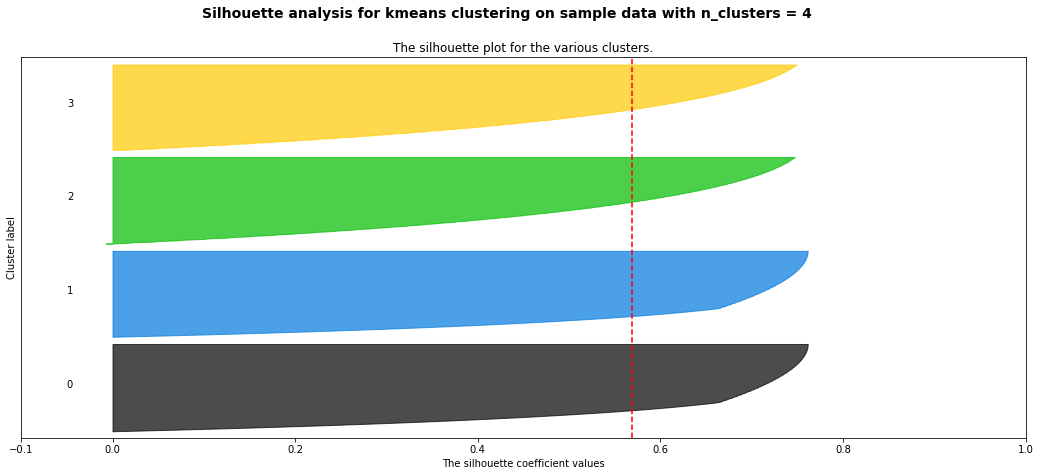

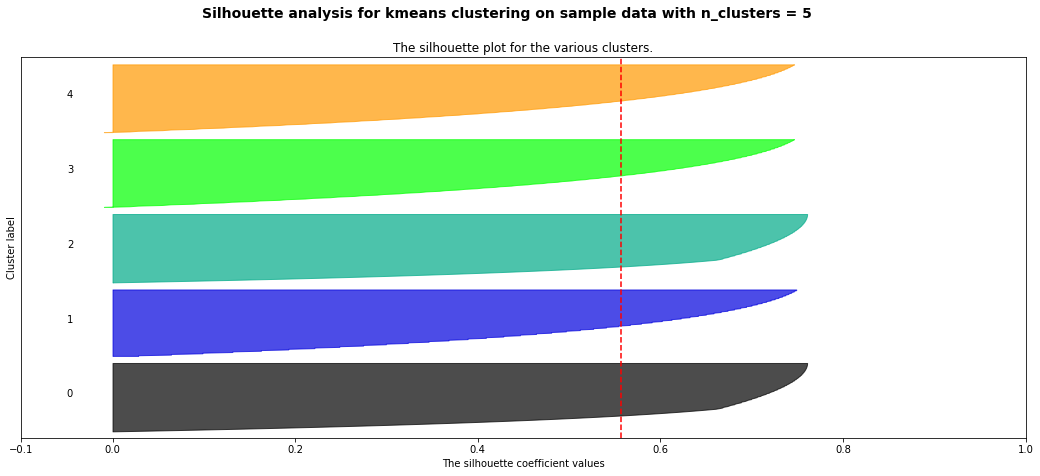

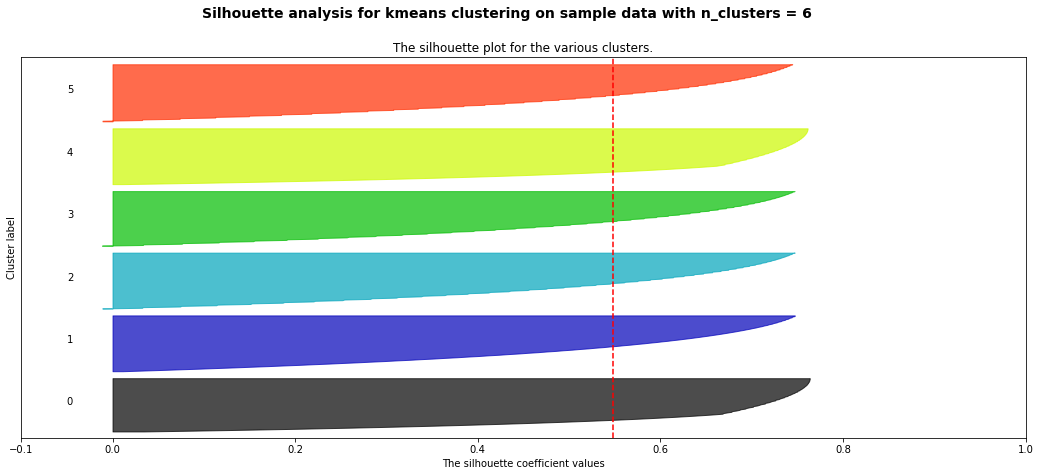

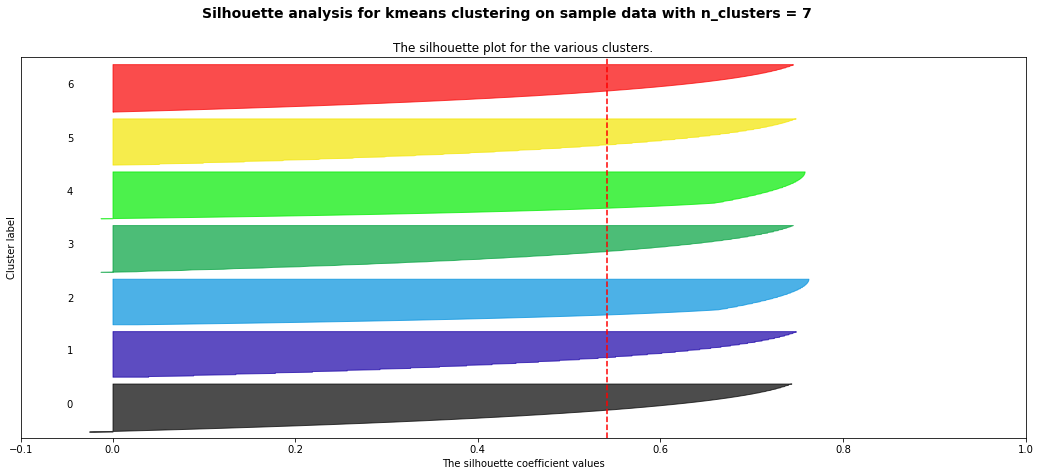

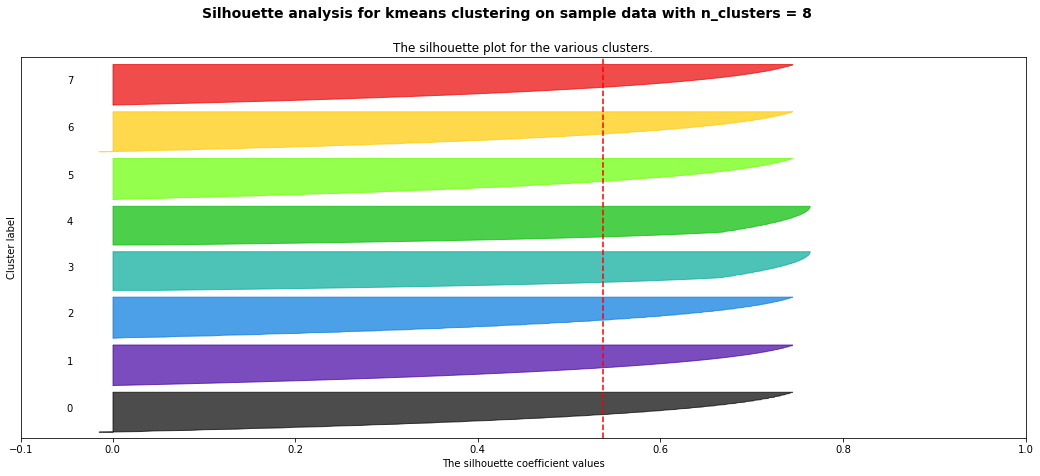

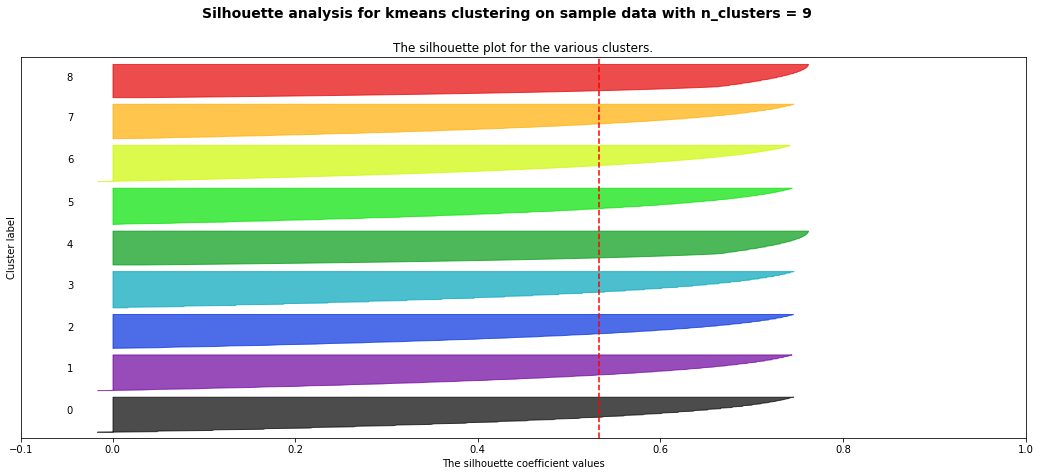

In [60]:
X = df_pca.values
range_n_clusters  = list(range(2,10))

getSilhouette(X, range_n_clusters, "kmeans")

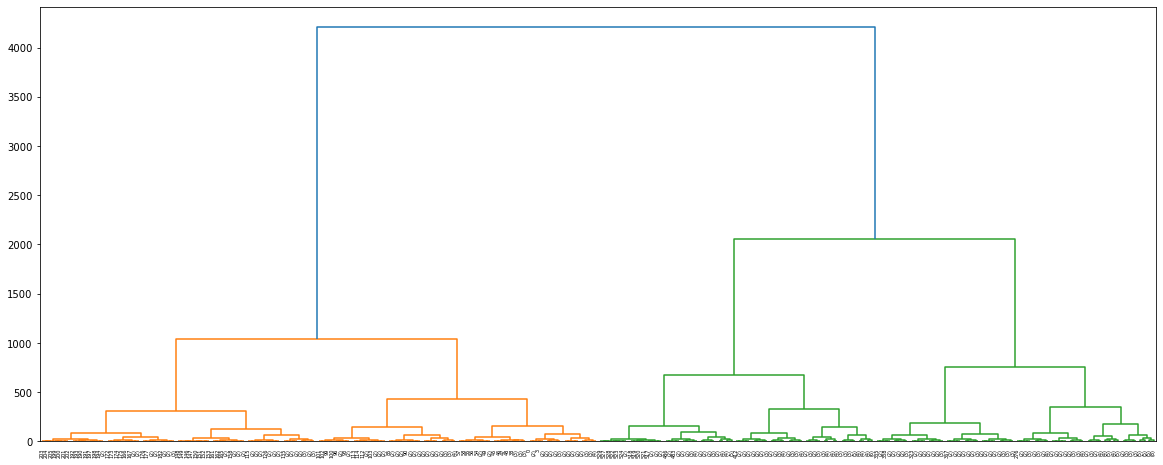

In [61]:
  # Hierarchicalalal Agglomerative
mergings = linkage(df_pca, method='ward')

plt.figure(figsize=(20,8))
dendrogram(mergings,
           p = 7,
           truncate_mode = 'level',
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [62]:
# The hierarchical agglomerative has a set of 4 clear groups. Grouping the
# 2 smaller orange groupings together, you can get to a total of 3 groups.